In [1]:
import requests
wikipedia_page = requests.get("https://en.wikipedia.org/wiki/Economy_of_India").text
# wikipedia_page

In [2]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(wikipedia_page, 'lxml')
# print(soup.prettify())

In [3]:
gdp_table = soup.find('table',{'class':'wikitable sortable'})
# gdp_table

In [4]:
import pandas as pd

columns = ['Year', 'GDP-Growth-Rate']
df = pd.DataFrame(columns=columns)

In [5]:
gdp_data_arr = []
for row in gdp_table.select('tbody > tr')[1:]:
    gdp_data_arr.append({
            'Year':int(row.select_one('td:nth-child(1)').text.strip()), 
            'GDP-Growth-Rate':float(row.select_one('td:nth-child(5)').text.strip().encode('ascii', 'ignore').decode('utf-8').replace('%',''))
        })
r = gdp_table.select('tbody > tr')[1]
r.select_one('td:nth-child(1)').text.strip()
type(r.select_one('td:nth-child(5)').text.strip().encode('ascii', 'ignore'))

bytes

In [6]:
df = df.append(gdp_data_arr,ignore_index=True)
df = df[df['Year']>2008]
df

,Year,GDP-Growth-Rate
29,2009,8.5
30,2010,10.3
31,2011,6.6
32,2012,5.5
33,2013,6.4
34,2014,7.4
35,2015,8.0
36,2016,8.2
37,2017,7.2
38,2018,7.1


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

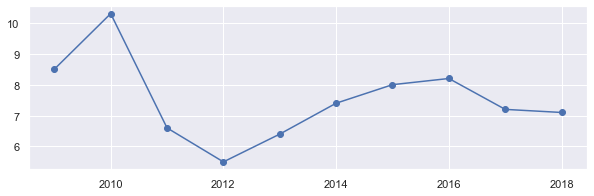

In [36]:
# Apply xkcd mode
# plt.xkcd()
# Remove XKCD mode:
# plt.rcdefaults()

plt.figure(figsize=(10,3))
# plt.xticks(df['Year'])
# plt.yticks(df['GDP-Growth-Rate'])
plt.plot(df['Year'], df['GDP-Growth-Rate'],marker='o', color='b')

# plt.scatter(df['Year'], df['GDP-Growth-Rate'])
plt.show()



In [18]:
import seaborn as sns
sns.set()

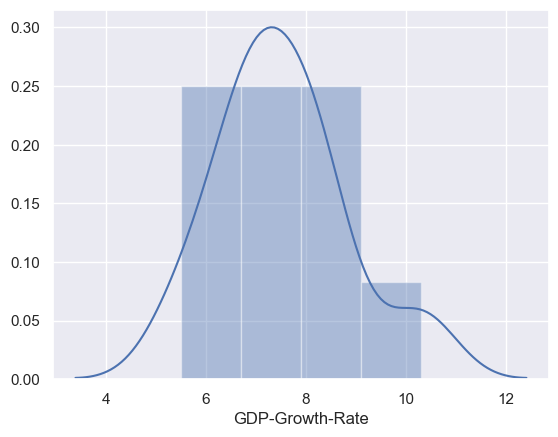

In [19]:
sns.distplot(df['GDP-Growth-Rate'])